In [1]:
pip install lxml

     |████████████████████████████████| 5.8MB 8.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto')[0]
df.head()

CDN number City-designated neighbourhood  Former city/borough  \
0         129               Agincourt North          Scarborough   
1         128  Agincourt South-Malvern West          Scarborough   
2          20                     Alderwood            Etobicoke   
3          95                         Annex  Old City of Toronto   
4          42             Banbury-Don Mills           North York   

         Neighbourhoods covered  Map  
0        Agincourt and Brimwood  NaN  
1         Agincourt and Malvern  NaN  
2                     Alderwood  NaN  
3  The Annex and Seaton Village  NaN  
4                     Don Mills  NaN

In [3]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The fo

In [4]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries import done.')

Libraries import done.


In [5]:
df.drop(['Map'],axis=1,inplace = True)

In [6]:
df.head()

CDN number City-designated neighbourhood  Former city/borough  \
0         129               Agincourt North          Scarborough   
1         128  Agincourt South-Malvern West          Scarborough   
2          20                     Alderwood            Etobicoke   
3          95                         Annex  Old City of Toronto   
4          42             Banbury-Don Mills           North York   

         Neighbourhoods covered  
0        Agincourt and Brimwood  
1         Agincourt and Malvern  
2                     Alderwood  
3  The Annex and Seaton Village  
4                     Don Mills

In [7]:
new_col_names = ['area_number','neighbourhood','borough','neighbourhoods_covered']
df.columns = new_col_names
df.head()

area_number                 neighbourhood              borough  \
0          129               Agincourt North          Scarborough   
1          128  Agincourt South-Malvern West          Scarborough   
2           20                     Alderwood            Etobicoke   
3           95                         Annex  Old City of Toronto   
4           42             Banbury-Don Mills           North York   

         neighbourhoods_covered  
0        Agincourt and Brimwood  
1         Agincourt and Malvern  
2                     Alderwood  
3  The Annex and Seaton Village  
4                     Don Mills

In [8]:
df.shape

(140, 4)

In [9]:
pip install xlrd

     |████████████████████████████████| 112kB 29.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
demogs = pd.read_excel('demographics-nhs-indicators-2011.xlsx', skiprows = [1])
demogs.head()

Hood#  Total Population  Child0-14  Youth15-24  Seniors65  \
0      1             34100       5970        5405       4305   
1      2             32790       7665        5020       2945   
2      3             10140       1825        1350       1745   
3      4             10485       1585        1315       1915   
4      5              9550       2110        1380       1095   

     Total visible minority population      South Asian      Chinese  \
0                                26475            13080          695   
1                                28175            12720          200   
2                                 6285             2285          105   
3                                 4425             1435          200   
4                                 5510              925          120   

       Black      Filipino      Latin American      Arab      Southeast Asian  \
0       6385          1470                1220       235                  820   
1       8285           680                 870      1605                  560   
2       1530           485                 670       210                  200   
3       1025           245                 650        55                   85   
4       2150           605                 695        80                  400   

       West Asian      Korean      Japanese      Visible minority, n.i.e.  \
0             220         100            55                          1615   
1            1160          85             0                          1565   
2             285           0            10                           225   
3              40          90            50                           385   
4             265          55             0                            70   

       Multiple visible minorities    Not a visible minority  \
0                              580                      6855   
1                              435                      4525   
2                              275                      3705   
3                              175                      5735   
4                              145                      4030   

   Total - Mobility status 5 years ago    Non-movers    Movers  \
0                                31460         20635     10820   
1                                30105         16210     13895   
2                                 9380          6290      3085   
3                                 9705          6890      2815   
4                                 8935          6200      2740   

   Total recent immigrant population in private households by selected places of birth  \
0                                               2750                                     
1                                               5850                                     
2                                               1070                                     
3                                                800                                     
4                                                545                                     

   Middle East/Western Asia  Eastern  South East  Southern  \
0                         0       65         250      1495   
1                      1380        0         120      2625   
2                       195        0          80       400   
3                         0       35          20       405   
4                        30        0          50        80   

       Other places of birth in Asia  Americas w/o USA    Europe    Africa  \
0                                 40               530        40       260   
1                                 30               710        75       830   
2                                  0               190        15       130   
3                                  0               255        50         0   
4                                  0               205        55        90   

   Total population aged 15 years and over by labour force status   \


In [11]:
list(demogs.columns)

['Hood#',
 'Total Population',
 'Child0-14',
 'Youth15-24',
 'Seniors65',
 '  Total visible minority population',
 '    South Asian',
 '    Chinese',
 '    Black',
 '    Filipino',
 '    Latin American',
 '    Arab',
 '    Southeast Asian',
 '    West Asian',
 '    Korean',
 '    Japanese',
 '    Visible minority, n.i.e.',
 '    Multiple visible minorities',
 '  Not a visible minority',
 'Total - Mobility status 5 years ago',
 '  Non-movers',
 '  Movers',
 'Total recent immigrant population in private households by selected places of birth',
 'Middle East/Western Asia',
 'Eastern',
 'South East',
 'Southern',
 '    Other places of birth in Asia',
 'Americas w/o USA',
 '  Europe',
 '  Africa',
 'Total population aged 15 years and over by labour force status ',
 '  In the labour force ',
 '    Unemployed',
 '  Not in the labour force',
 '  No certificate, diploma or degree',
 '    College, CEGEP or other non-university certificate or diploma',
 '    University certificate or diploma belo

In [12]:
demogs.shape

(140, 48)

In [13]:
uni_data = pd.merge(df,demogs,left_on = 'area_number',right_on='Hood#')

In [14]:
uni_data = uni_data.drop('Hood#', axis = 1)

In [15]:
uni_data.groupby(['area_number', 'neighbourhood', 'borough']).sum()

Total Population  \
area_number neighbourhood                       borough                                 
1           West Humber-Clairville              Etobicoke                       34100   
2           Mount Olive-Silverstone-Jamestown   Etobicoke                       32790   
3           Thistletown-Beaumond Heights        Etobicoke                       10140   
4           Rexdale-Kipling                     Etobicoke                       10485   
5           Elms-Old Rexdale                    Etobicoke                        9550   
6           Kingsview Village-The Westway       Etobicoke                       21725   
7           Willowridge-Martingrove-Richview    Etobicoke                       21345   
8           Humber Heights-Westmount            Etobicoke                       10580   
9           Edenbridge-Humber Valley            Etobicoke                       14945   
10          Princess-Rosethorn                  Etobicoke                       11200   
11          Eringate-Centennial-West Deane      Etobicoke                       18805   
12          Markland Wood                       Etobicoke                       10435   
13          Etobicoke West Mall                 Etobicoke                       10925   
14          Islington-City Centre West          Etobicoke                       38070   
15          Kingsway South                      Etobicoke                        9175   
16          Stonegate-Queensway                 Etobicoke                       24690   
17          Mimico                              Etobicoke                       26550   
18          New Toronto                         Etobicoke                       10905   
19          Long Branch                         Etobicoke                        9630   
20          Alderwood                           Etobicoke                       11900   
21          Humber Summit                       North York                      12530   
22          Humbermede                          North York                      15850   
23          Pelmo Park-Humberlea                North York                       8705   
24          Black Creek                         North York                      22060   
25          Glenfield-Jane Heights              North York                      31395   
26          Downsview-Roding-CFB                North York                      34650   
27          York University Heights             North York                      27715   
28          Rustic                              North York                       9950   
29          Maple Leaf                          North York                      10195   
30          Brookhaven-Amesbury                 North York                      17785   
31          Yorkdale-Glen Park                  North York                      14685   
32          Englemount-Lawrence                 North York                      22080   
33          Clanton Park                        North York                      14610   
34          Bathurst Manor                      North York                      15435   
35          Westminster-Branson                 North York                      25445   
36          Newtonbrook West                    North York                      23050   
37          Willowdale West                     North York                      15005   
38          Lansing-Westgate                    North York                      14640   
39          Bedford Park-Nortown                North York                      23185   
40          St. Andrew-Windfields               North York                      17955   
41          Bridle Path-Sunnybrook-York Mills   North York                       8715   
42          Banbury-Don Mills                   North York                      26910   
43          Victoria Village                    North York                      17180   
44          Flemingdon Park                     North York      

In [16]:
uni_data.columns = uni_data.columns.str.replace(' ', '')
uni_data.head(1)

area_number    neighbourhood      borough  neighbourhoods_covered  \
0          129  Agincourt North  Scarborough  Agincourt and Brimwood   

   TotalPopulation  Child0-14  Youth15-24  Seniors65  \
0            30280       4225        4165       5095   

   Totalvisibleminoritypopulation  SouthAsian  Chinese  Black  Filipino  \
0                           27015        5785    16640   1210      1610   

   LatinAmerican  Arab  SoutheastAsian  WestAsian  Korean  Japanese  \
0            105   260             495        210     100        25   

   Visibleminority,n.i.e.  Multiplevisibleminorities  Notavisibleminority  \
0                     225                        350                 2910   

   Total-Mobilitystatus5yearsago  Non-movers  Movers  \
0                          28615       18750    9860   

   Totalrecentimmigrantpopulationinprivatehouseholdsbyselectedplacesofbirth  \
0                                               2935                          

   MiddleEast/WesternAsia  Eastern  SouthEast  Southern  \
0                      15     1625        315       675   

   OtherplacesofbirthinAsia  Americasw/oUSA  Europe  Africa  \
0                       130              60       0       0   

   Totalpopulationaged15yearsandoverbylabourforcestatus  Inthelabourforce  \
0                                              25765                14920   

   Unemployed  Notinthelabourforce  Nocertificate,diplomaordegree  \
0        1685                10845                           5965   

   College,CEGEPorothernon-universitycertificateordiploma  \
0                                               3465        

   Universitycertificateordiplomabelowbachelorlevel  \
0                                              1805   

   Totalnumberofprivatehouseholdsbytenure  Owner  Renter  \
0                                    9145   7335    1810   

   %ofownerhouseholdsspending30%ormoreofhouseholdtotalincomeonsheltercosts  \
0                                               32.0                         

   Majorrepairsneeded  Averagemonthlysheltercostsforrenteddwellings($)  \
0                 425                                              976   

   Averageafter-taxfamilyincome$(Familyincomein2010ofeconomicfamilies)  \
0                                              67622                     

   Householdincomein2010ofprivatehouseholds  Medianhouseholdtotalincome$  \
0                                      9145                        60162   

   Medianafter-taxhouseholdincome$  
0                            55893

### Standardizing high importance variables for finding top 20 neighbourhoods for opening Indian restaurant

In [17]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
columns = ['TotalPopulation', 'Youth15-24','SouthAsian','Householdincomein2010ofprivatehouseholds', 'Medianafter-taxhouseholdincome$']
scaler = MinMaxScaler()
data = uni_data[columns]
scaler.fit(data)
scaled = scaler.transform(data)
uni_ndata = pd.DataFrame(scaled)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
uni_ndata.columns = ['TotalPopulation', 'Youth15-24','SouthAsian','Householdincomein2010ofprivatehouseholds', 'Medianafter-taxhouseholdincome$']
uni_ndata
uni_ndata["sum_score"] = uni_ndata.sum(axis=1)

In [19]:
uni_ndata['area_number'] = uni_ndata.index
uni_ndata.head()

TotalPopulation  Youth15-24  SouthAsian  \
0         0.507682    0.501460    0.272553   
1         0.330773    0.347445    0.169419   
2         0.115450    0.088321    0.019622   
3         0.484208    0.464964    0.034937   
4         0.435766    0.290511    0.107681   

   Householdincomein2010ofprivatehouseholds  Medianafter-taxhouseholdincome$  \
0                                  0.266393                         0.192103   
1                                  0.173484                         0.176742   
2                                  0.082014                         0.234268   
3                                  0.529496                         0.146325   
4                                  0.374306                         0.225091   

   sum_score  area_number  
0   1.740191            0  
1   1.197862            1  
2   0.539675            2  
3   1.659930            3  
4   1.433355            4

In [20]:
map_db = pd.merge(df,uni_ndata)
map_db.head()

area_number                 neighbourhood              borough  \
0          129               Agincourt North          Scarborough   
1          128  Agincourt South-Malvern West          Scarborough   
2           20                     Alderwood            Etobicoke   
3           95                         Annex  Old City of Toronto   
4           42             Banbury-Don Mills           North York   

         neighbourhoods_covered  TotalPopulation  Youth15-24  SouthAsian  \
0        Agincourt and Brimwood         0.822343    0.837956    0.101699   
1         Agincourt and Malvern         0.438114    0.397080    0.169897   
2                     Alderwood         0.071810    0.083212    0.008375   
3  The Annex and Seaton Village         0.154609    0.150365    0.012922   
4                     Don Mills         0.094644    0.101460    0.053123   

   Householdincomein2010ofprivatehouseholds  Medianafter-taxhouseholdincome$  \
0                                  0.697636                         0.186447   
1                                  0.300514                         0.175716   
2                                  0.034943                         0.156375   
3                                  0.146763                         0.164672   
4                                  0.056732                         0.151362   

   sum_score  
0   2.646081  
1   1.481321  
2   0.354715  
3   0.629330  
4   0.457320

In [21]:
map_db.sort_values(by=['sum_score'],inplace=True, ascending=False)

In [22]:
map_db.rename({'area_number':'AREA_SHORT_CODE'}, axis='columns', inplace = True)

In [23]:
map_db_20 = map_db[:20]
map_db_20

AREA_SHORT_CODE                   neighbourhood              borough  \
73               132                         Malvern          Scarborough   
92               107                 Oakwood Village                 York   
89                74            North St. James Town  Old City of Toronto   
12               122           Birchcliffe-Cliffside          Scarborough   
30                66                        Danforth  Old City of Toronto   
0                129                 Agincourt North          Scarborough   
61               124                    Kennedy Park          Scarborough   
87                82                         Niagara  Old City of Toronto   
29                59            Danforth - East York            East York   
136               97                  Yonge-St.Clair  Old City of Toronto   
25                33                    Clanton Park           North York   
97                23            Pelmo Park-Humberlea           North York   
5                 34                  Bathurst Manor           North York   
38               138                   Eglinton East          Scarborough   
41                11  Eringate-Centennial-West Deane            Etobicoke   
116                3    Thistletown-Beaumond Heights            Etobicoke   
99                46                   Pleasant View           North York   
71                84                 Little Portugal  Old City of Toronto   
26               123                      Cliffcrest          Scarborough   
1                128    Agincourt South-Malvern West          Scarborough   

                         neighbourhoods_covered  TotalPopulation  Youth15-24  \
73                                      Malvern         1.000000    1.000000   
92                              Oakwood Village         0.841122    0.906569   
89                               St. James Town         0.823624    0.909489   
12                    Birch Cliff and Cliffside         0.786918    0.577372   
30                                 The Danforth         0.819996    0.797810   
0                        Agincourt and Brimwood         0.822343    0.837956   
61                         Scarborough Junction         0.589202    0.682482   
87   Niagara, Liberty Village, Exhibition Place         0.561246    0.626277   
29                  Old East York, The Danforth         0.673922    0.525547   
136                                         NaN         0.600299    0.581022   
25                               Wilson Heights         0.600619    0.529197   
97                                    Humberlea         0.466389    0.548175   
5                                Bathurst Manor         0.600939    0.511679   
38                                Eglinton East         0.452945    0.627737   
41          Centennial Park and West Deane Park         0.456253    0.439416   
116                                         NaN         0.484208    0.464964   
99                                Pleasant View         0.531477    0.557664   
71                 Little Portugal and Brockton         0.471618    0.286861   
26                                    Cliffside         0.428084    0.466423   
1                         Agincourt and Malvern         0.438114    0.397080   

     SouthAsian  Householdincomein2010ofprivatehouseholds  \
73     1.000000                                  0.646043   
92     0.847810                                  0.427338   
89     0.867911                                  0.441727   
12     0.174204                                  1.000000   
30     0.393635                                  0.503803   
0      0.101699                                  0.697636   
61     0.621680                                  0.306886   
87     0.604451                                  0.285509   
29     0.117014                                  0.558479   
136    0.176597                                  0.430627   
25     0.084231                    

In [24]:
toronto_geo = r'Neighbourhoods.geojson'

In [25]:
toronto_map = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

In [26]:
CLIENT_ID = 'X5XYTV4ABDYILZ2CWBIHI13WDWZ3XWJKCMWRIRBXQIOBRESY' # your Foursquare ID
CLIENT_SECRET = '3SWJLCKFFHGFACAHCKD3SFRYSAUU1HUKZSW2SBGSYWJ1Z022' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X5XYTV4ABDYILZ2CWBIHI13WDWZ3XWJKCMWRIRBXQIOBRESY
CLIENT_SECRET:3SWJLCKFFHGFACAHCKD3SFRYSAUU1HUKZSW2SBGSYWJ1Z022


In [27]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [28]:
with open('Neighbourhoods.geojson') as json_data:
    to_data = json.load(json_data)

In [29]:
toronto_map.choropleth(
    geo_data=to_data,
    data=map_db,
    columns=['AREA_SHORT_CODE','sum_score'],
    key_on='feature.properties.AREA_SHORT_CODE',
    fill_color='YlOrRd', 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Legend'
)
toronto_map

In [30]:
neighborhoods_data = to_data['features']

In [31]:
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'_id': 3781,
  'AREA_ID': 25886861,
  'AREA_ATTR_ID': 25926662,
  'PARENT_AREA_ID': 49885,
  'AREA_SHORT_CODE': 94,
  'AREA_LONG_CODE': 94,
  'AREA_NAME': 'Wychwood (94)',
  'AREA_DESC': 'Wychwood (94)',
  'X': None,
  'Y': None,
  'LONGITUDE': -79.425514947,
  'LATITUDE': 43.6769192679,
  'OBJECTID': 16491505,
  'Shape__Area': 3217959.609375,
  'Shape__Length': 7515.779658331329,
  'style': {'weight': 1,
   'opacity': 0.2,
   'color': 'black',
   'fillOpacity': 0.7,
   'fillColor': '#fed976'},
  'highlight': {}},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-79.4359157087306, 43.6801533947749],
    [-79.4349150633973, 43.6803688699489],
    [-79.4339472722385, 43.6805785044903],
    [-79.433881624222, 43.6805899612147],
    [-79.4328154497888, 43.6808080444588],
    [-79.4326971769691, 43.6807965882232],
    [-79.4325306465987, 43.68082785962871],
    [-79.4324594444965, 43.680858827103606],
    [-79.4324113272399, 43.6808979453726],
    [-7

### Getting Latitude and Longitude information for all Toronto Neighbourhoods

In [32]:
# define the dataframe columns
column_names = ['Neighborhood_Num', 'Neighborhood_Name', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [33]:
for data in neighborhoods_data:
    neighborhood_name = data['properties']['AREA_NAME'] 
    neighborhood_num = data['properties']['AREA_SHORT_CODE']
        
    neighborhood_lat = data['properties']['LATITUDE']
    neighborhood_lon = data['properties']['LONGITUDE']
    
    neighborhoods = neighborhoods.append({'Neighborhood_Num': neighborhood_num,
                                          'Neighborhood_Name': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [34]:
neighborhoods.head()

Neighborhood_Num             Neighborhood_Name   Latitude  Longitude
0               94                 Wychwood (94)  43.676919 -79.425515
1              100          Yonge-Eglinton (100)  43.704689 -79.403590
2               97           Yonge-St.Clair (97)  43.687859 -79.397871
3               27  York University Heights (27)  43.765736 -79.488883
4               31       Yorkdale-Glen Park (31)  43.714672 -79.457108

In [35]:
# create map of New York using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ne_num, ne_name in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood_Num'], neighborhoods['Neighborhood_Name']):
    label = '{}, {}'.format(ne_num, ne_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

### Getting venues within 500 m range for all neighbourhoods and location (lat, lon) for venues

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
tor_venues = getNearbyVenues(names=neighborhoods['Neighborhood_Name'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wychwood (94)
Yonge-Eglinton (100)
Yonge-St.Clair (97)
York University Heights (27)
Yorkdale-Glen Park (31)
Lambton Baby Point (114)
Lansing-Westgate (38)
Lawrence Park North (105)
Lawrence Park South (103)
Leaside-Bennington (56)
Little Portugal (84)
Long Branch (19)
Malvern (132)
Maple Leaf (29)
Markland Wood (12)
Milliken (130)
Mimico (includes Humber Bay Shores) (17)
Morningside (135)
Moss Park (73)
Mount Dennis (115)
Mount Olive-Silverstone-Jamestown (2)
Mount Pleasant East (99)
Mount Pleasant West (104)
New Toronto (18)
Newtonbrook East (50)
Newtonbrook West (36)
Niagara (82)
North Riverdale (68)
North St.James Town (74)
O'Connor-Parkview (54)
Oakridge (121)
Oakwood Village (107)
Old East York (58)
Palmerston-Little Italy (80)
Parkwoods-Donalda (45)
Pelmo Park-Humberlea (23)
Playter Estates-Danforth (67)
Pleasant View (46)
Princess-Rosethorn (10)
Regent Park (72)
Rexdale-Kipling (4)
Rockcliffe-Smythe (111)
Roncesvalles (86)
Rosedale-Moore Park (98)
Rouge (131)
Runnymede-Bloor Wes

In [38]:
print(tor_venues.shape)
tor_venues.head()

(1662, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Wychwood (94)              43.676919              -79.425515   
1         Wychwood (94)              43.676919              -79.425515   
2         Wychwood (94)              43.676919              -79.425515   
3         Wychwood (94)              43.676919              -79.425515   
4  Yonge-Eglinton (100)              43.704689              -79.403590   

                                     Venue  Venue Latitude  Venue Longitude  \
0                           Wychwood Barns       43.680028       -79.423810   
1           Wychwood Barns Farmers' Market       43.680010       -79.423849   
2                           Hillcrest Park       43.676012       -79.424787   
3                        Marian Engel Park       43.673754       -79.423988   
4  North Toronto Memorial Community Centre       43.706098       -79.404337   

   Venue Category  
0     Event Space  
1  Farmers Market  
2            Park  
3            Park  
4             Gym

### Unique categories

In [39]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 260 uniques categories.


### Analyzing each neighbourhood

In [40]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['_Neighborhood'] = tor_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]
tor_onehot.drop(['Neighborhood'],axis=1,inplace=True)
tor_onehot.rename(columns={'_Neighborhood': 'Neighborhood'}, inplace=True)
tor_onehot.head()

Neighborhood  African Restaurant  American Restaurant  \
0         Wychwood (94)                   0                    0   
1         Wychwood (94)                   0                    0   
2         Wychwood (94)                   0                    0   
3         Wychwood (94)                   0                    0   
4  Yonge-Eglinton (100)                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Argentinian Restaurant  \
0             0               0             0                       0   
1             0               0             0                       0   
2             0               0             0                       0   
3             0               0             0                       0   
4             0               0             0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       0   
1                0            0          0           0           0       0   
2                0            0          0           0           0       0   
3                0            0          0           0           0       0   
4                0            0          0           0           0       0   

   Bank  Bar  Baseball Field  Basketball Court  Beer Bar  Beer Store  \
0     0    0               0                 0         0           0   
1     0    0               0                 0         0           0   
2     0    0               0                 0         0           0   
3     0    0               0                 0         0           0   
4     0    0               0                 0         0           0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0          0       0              0          0         0              0   
1          0       0              0          0         0              0   
2          0       0              0          0         0              0   
3          0       0              0          0         0              0   
4          0       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   
1                0       0             0              0         0   
2                0       0             0              0         0   
3                0       0             0              0         0   
4                0       0             0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  Candy Store  \
0            0         0                 0        0     0            0   
1            0         0                 0        0     0            0   
2            0         0                 0        0     0            0   
3            0         0                 0        0     0            0   
4            0         0                 0        0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Castle  Cheese Shop  \
0                     0   

In [41]:
tor_onehot.shape

(1662, 260)

### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [42]:
tor_grouped = tor_onehot.groupby('Neighborhood').sum().reset_index()
tor_grouped

Neighborhood  African Restaurant  \
0                       Agincourt North (129)                   0   
1          Agincourt South-Malvern West (128)                   0   
2                              Alderwood (20)                   0   
3                                  Annex (95)                   0   
4                      Banbury-Don Mills (42)                   0   
5                         Bathurst Manor (34)                   0   
6                    Bay Street Corridor (76)                   0   
7                        Bayview Village (52)                   0   
8                  Bayview Woods-Steeles (49)                   0   
9                   Bedford Park-Nortown (39)                   0   
10              Beechborough-Greenbrook (112)                   0   
11                              Bendale (127)                   0   
12                Birchcliffe-Cliffside (122)                   0   
13                           Black Creek (24)                   0   
14                           Blake-Jones (69)                   0   
15                 Briar Hill-Belgravia (108)                   0   
16     Bridle Path-Sunnybrook-York Mills (41)                   0   
17                       Broadview North (57)                   0   
18                   Brookhaven-Amesbury (30)                   0   
19       Cabbagetown-South St.James Town (71)                   0   
20                   Caledonia-Fairbank (109)                   0   
21                             Casa Loma (96)                   0   
22               Centennial Scarborough (133)                   0   
23                 Church-Yonge Corridor (75)                   0   
24                  Clairlea-Birchmount (120)                   0   
25                          Clanton Park (33)                   0   
26                           Cliffcrest (123)                   0   
27                Corso Italia-Davenport (92)                   0   
28                              Danforth (66)                   0   
29                    Danforth East York (59)                   0   
30                    Don Valley Village (47)                   0   
31                          Dorset Park (126)                   0   
32   Dovercourt-Wallace Emerson-Junction (93)                   0   
33                  Downsview-Roding-CFB (26)                   0   
34                        Dufferin Grove (83)                   0   
35                     East End-Danforth (62)                   0   
36               Edenbridge-Humber Valley (9)                   0   
37                        Eglinton East (138)                   0   
38                       Elms-Old Rexdale (5)                   1   
39                   Englemount-Lawrence (32)                   0   
40        Eringate-Centennial-West Deane (11)                   0   
41                   Etobicoke West Mall (13)                   0   
42                       Flemingdon Park (44)                   0   
43                    Forest Hill North (102)                   0   
44                    Forest Hill South (101)                   0   
45                Glenfield-Jane Heights (25)                   0   
46                     Greenwood-Coxwell (65)                   0   
47                            Guildwood (140)                   0   
48                            Henry Farm (53)                   0   
49                       High Park North (88)                   0   
50                     High Park-Swansea (87)                   0   
51                       Highland Creek (134)                   0   
52                     Hillcrest Village (48)                   0   
53               Humber Heights-Westmount (8)                   0   
54                         Humber Summit (21)                   0   
55                            Humbermede (22)                   0   
56                   Humewood-Cedarvale (106)                   0   
57                             

In [43]:
col_list1 = tor_grouped.filter(regex=('Neighborhood'),axis=1) #Neighborhood
col_list1 = col_list1.columns.tolist()

In [44]:
col_list2 = tor_grouped.filter(regex='Restaurant',axis=1) #All restaurants
col_list2 = col_list2.columns.tolist()

In [45]:
col_list3 = tor_grouped.filter(regex='Indian',axis=1) #Indian
col_list3 = col_list3.columns.tolist()
col_list3.insert(0,'Neighborhood')

In [46]:
col_list4 = tor_grouped.filter(regex='Asian',axis=1) #Asian
col_list4 = col_list4.columns.tolist()

In [47]:
col_list = col_list1+col_list2

In [50]:
tor_grouped[col_list]
tor_grouped['Total Restaurants'] = tor_grouped.sum(axis=1)
tor_grouped.head(1)

Neighborhood  African Restaurant  American Restaurant  \
0  Agincourt North (129)                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Argentinian Restaurant  \
0             0               0             0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       1   

   Bank  Bar  Baseball Field  Basketball Court  Beer Bar  Beer Store  \
0     1    0               0                 0         0           1   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0          0       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  Candy Store  \
0            0         0                 0        0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Castle  Cheese Shop  \
0                     0                     0       0            0   

   Chinese Restaurant  Chiropractor  Chocolate Shop  Clothing Store  \
0                   2             0               0               1   

   Cocktail Bar  Coffee Shop  College Arts Building  College Gym  \
0             0            0                      0            0   

   College Rec Center  College Stadium  Comfort Food Restaurant  Comic Shop  \
0                   0                0                        0           0   

   Concert Hall  Construction & Landscaping  Convenience Store  \
0             0                           0                  1   

   Cosmetics Shop  Costume Shop  Cuban Restaurant  Cupcake Shop  Curling Ice  \
0               0             0                 0             0            0   

   Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0             0              0                 0             0   

   Dim Sum Restaurant  Diner  Discount Store  Dive Bar  Doctor's Office  \
0                   1      0               1         0                0   

   Dog Run  Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0        0           0                    0                            0   

   Egyptian Restaurant  Electronics Store  Elementary School  \
0                    0                  0                  0   

   Ethiopian Restaurant  Event Service  Event Space  Falafel Restaurant  Farm  \
0                     0              0            0                   0     0   

   Farmers Market  Fast Food Restaurant  Field  Filipino Restaurant  \
0               0                     1      0                    0   

   Fish & Chips Shop  Fish Market  Flea Market  Flower Shop  \
0                  0            0            0            0   

   Food & Drink Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    1   

   Frozen Yogurt Shop  Fruit & Vegetable Store  Furniture / Home Store  \
0                   1                        0                       0   

   Gaming Cafe  Garden  Garden Center  Gas Station  Gastropub  Gay Bar  \
0            0       0              0            0          0        0   

   General Entertainment  German Restaurant  Gift Shop  Golf Driving Range  \
0                      0                  0          0                   0   

   Gourmet Shop  Government Building  Greek Restaurant  Grocery Store  Gym  \
0             0                    0                 0              0    0   

   Gym / Fitness Center  Gym Pool  Hardware Store  Health & B

In [51]:
tor_grouped.shape

(137, 261)

In [52]:
tor_grouped.Neighborhood.nunique()

137

In [53]:
tor_grouped[col_list3]
tor_grouped['Total Indian Restaurants'] = tor_grouped[col_list3].sum(axis=1)
tor_grouped.head(1)

Neighborhood  African Restaurant  American Restaurant  \
0  Agincourt North (129)                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Argentinian Restaurant  \
0             0               0             0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       1   

   Bank  Bar  Baseball Field  Basketball Court  Beer Bar  Beer Store  \
0     1    0               0                 0         0           1   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0          0       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  Candy Store  \
0            0         0                 0        0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Castle  Cheese Shop  \
0                     0                     0       0            0   

   Chinese Restaurant  Chiropractor  Chocolate Shop  Clothing Store  \
0                   2             0               0               1   

   Cocktail Bar  Coffee Shop  College Arts Building  College Gym  \
0             0            0                      0            0   

   College Rec Center  College Stadium  Comfort Food Restaurant  Comic Shop  \
0                   0                0                        0           0   

   Concert Hall  Construction & Landscaping  Convenience Store  \
0             0                           0                  1   

   Cosmetics Shop  Costume Shop  Cuban Restaurant  Cupcake Shop  Curling Ice  \
0               0             0                 0             0            0   

   Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0             0              0                 0             0   

   Dim Sum Restaurant  Diner  Discount Store  Dive Bar  Doctor's Office  \
0                   1      0               1         0                0   

   Dog Run  Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0        0           0                    0                            0   

   Egyptian Restaurant  Electronics Store  Elementary School  \
0                    0                  0                  0   

   Ethiopian Restaurant  Event Service  Event Space  Falafel Restaurant  Farm  \
0                     0              0            0                   0     0   

   Farmers Market  Fast Food Restaurant  Field  Filipino Restaurant  \
0               0                     1      0                    0   

   Fish & Chips Shop  Fish Market  Flea Market  Flower Shop  \
0                  0            0            0            0   

   Food & Drink Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    1   

   Frozen Yogurt Shop  Fruit & Vegetable Store  Furniture / Home Store  \
0                   1                        0                       0   

   Gaming Cafe  Garden  Garden Center  Gas Station  Gastropub  Gay Bar  \
0            0       0              0            0          0        0   

   General Entertainment  German Restaurant  Gift Shop  Golf Driving Range  \
0                      0                  0          0                   0   

   Gourmet Shop  Government Building  Greek Restaurant  Grocery Store  Gym  \
0             0                    0                 0              0    0   

   Gym / Fitness Center  Gym Pool  Hardware Store  Health & B

In [54]:
neighborhoods.head(1)

Neighborhood_Num Neighborhood_Name   Latitude  Longitude
0               94     Wychwood (94)  43.676919 -79.425515

In [55]:
master_db_wip = pd.merge(tor_grouped, neighborhoods, how='inner', left_on='Neighborhood', right_on = 'Neighborhood_Name')

In [56]:
master_db_wip.head(1)

Neighborhood  African Restaurant  American Restaurant  \
0  Agincourt North (129)                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Argentinian Restaurant  \
0             0               0             0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       1   

   Bank  Bar  Baseball Field  Basketball Court  Beer Bar  Beer Store  \
0     1    0               0                 0         0           1   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0          0       0              0          0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   

   Bubble Tea Shop  Buffet  Burger Joint  Burrito Place  Bus Line  \
0                0       0             0              0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  Candy Store  \
0            0         0                 0        0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Castle  Cheese Shop  \
0                     0                     0       0            0   

   Chinese Restaurant  Chiropractor  Chocolate Shop  Clothing Store  \
0                   2             0               0               1   

   Cocktail Bar  Coffee Shop  College Arts Building  College Gym  \
0             0            0                      0            0   

   College Rec Center  College Stadium  Comfort Food Restaurant  Comic Shop  \
0                   0                0                        0           0   

   Concert Hall  Construction & Landscaping  Convenience Store  \
0             0                           0                  1   

   Cosmetics Shop  Costume Shop  Cuban Restaurant  Cupcake Shop  Curling Ice  \
0               0             0                 0             0            0   

   Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0             0              0                 0             0   

   Dim Sum Restaurant  Diner  Discount Store  Dive Bar  Doctor's Office  \
0                   1      0               1         0                0   

   Dog Run  Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0        0           0                    0                            0   

   Egyptian Restaurant  Electronics Store  Elementary School  \
0                    0                  0                  0   

   Ethiopian Restaurant  Event Service  Event Space  Falafel Restaurant  Farm  \
0                     0              0            0                   0     0   

   Farmers Market  Fast Food Restaurant  Field  Filipino Restaurant  \
0               0                     1      0                    0   

   Fish & Chips Shop  Fish Market  Flea Market  Flower Shop  \
0                  0            0            0            0   

   Food & Drink Shop  Food Truck  French Restaurant  Fried Chicken Joint  \
0                  0           0                  0                    1   

   Frozen Yogurt Shop  Fruit & Vegetable Store  Furniture / Home Store  \
0                   1                        0                       0   

   Gaming Cafe  Garden  Garden Center  Gas Station  Gastropub  Gay Bar  \
0            0       0              0            0          0        0   

   General Entertainment  German Restaurant  Gift Shop  Golf Driving Range  \
0                      0                  0          0                   0   

   Gourmet Shop  Government Building  Greek Restaurant  Grocery Store  Gym  \
0             0                    0                 0              0    0   

   Gym / Fitness Center  Gym Pool  Hardware Store  Health & B

In [57]:
master_db_wip1 = master_db_wip.iloc[:,-6:]

In [58]:
master_db_wip['Total Restaurants'].max()

60

In [59]:
master_db_wip1.head(1)

Total Restaurants  Total Indian Restaurants Neighborhood_Num  \
0                 34                         0              129   

       Neighborhood_Name   Latitude  Longitude  
0  Agincourt North (129)  43.805441 -79.266712

### Looking at number of restaurants across neighbourhoods

Text(0, 0.5, '# Neighbourhoods')

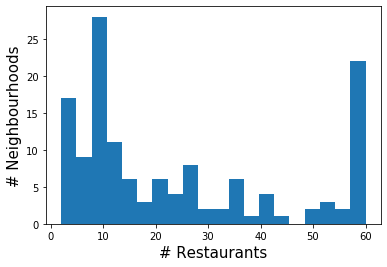

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
master_db_wip['Total Restaurants'].hist(bins=20, grid = False)
plt.xlabel("# Restaurants", fontsize=15)
plt.ylabel("# Neighbourhoods",fontsize=15)

In [61]:
columns.insert(0,'area_number')
columns

['area_number',
 'TotalPopulation',
 'Youth15-24',
 'SouthAsian',
 'Householdincomein2010ofprivatehouseholds',
 'Medianafter-taxhouseholdincome$']

In [62]:
top20_stats = pd.merge(map_db_20['AREA_SHORT_CODE'], uni_data[columns], left_on = 'AREA_SHORT_CODE',  right_on='area_number')
top20_stats

AREA_SHORT_CODE  area_number  TotalPopulation  Youth15-24  SouthAsian  \
0               132          132            45085        6960       18225   
1               107          107            21075        2355         615   
2                74           74            17825        2400        3390   
3               122          122            21860        2570        1080   
4                66           66             9450        1010         735   
5               129          129            30280        4165        5785   
6               124          124            17050        2210        3855   
7                82           82            21000        1765        1000   
8                59           59            16710        1545         630   
9                97           97            11655         930         310   
10               33           33            14610        1715         375   
11               23           23             8705        1135         480   
12               34           34            15435        1810         530   
13              138          138            22830        3080        6675   
14               11           11            18805        2550        1315   
15                3            3            10140        1350        2285   
16               46           46            16145        2010        1615   
17               84           84            12055        1230         265   
18              123          123            15700        2110        2040   
19              128          128            21990        3110        3630   

    Householdincomein2010ofprivatehouseholds  Medianafter-taxhouseholdincome$  
0                                      13410                            53425  
1                                       8555                            46349  
2                                       9205                            31304  
3                                       9190                            57017  
4                                       3905                            62482  
5                                       9145                            55893  
6                                       6530                            41776  
7                                      12640                            59929  
8                                       6950                            63221  
9                                       6780                            58838  
10                                      5535                            54498  
11                                      2975                            59842  
12                                      6020                            51076  
13                                      8055                            42790  
14                                      6895                            69740  
15                                      3225                            57522  
16                                      5525                            60065  
17                                      5305                            52519  
18                                      5820                            60384  
19                                      6885                            53886

In [63]:
master_db = pd.merge(master_db_wip1, top20_stats, left_on = 'Neighborhood_Num', right_on = 'area_number')
master_db.head(1)

Total Restaurants  Total Indian Restaurants Neighborhood_Num  \
0                 34                         0              129   

       Neighborhood_Name   Latitude  Longitude  AREA_SHORT_CODE  area_number  \
0  Agincourt North (129)  43.805441 -79.266712              129          129   

   TotalPopulation  Youth15-24  SouthAsian  \
0            30280        4165        5785   

   Householdincomein2010ofprivatehouseholds  Medianafter-taxhouseholdincome$  
0                                      9145                            55893

In [64]:
master_db2 = master_db.drop(['area_number', 'AREA_SHORT_CODE', 'Householdincomein2010ofprivatehouseholds'],axis=1)
master_db2.head(1)

Total Restaurants  Total Indian Restaurants Neighborhood_Num  \
0                 34                         0              129   

       Neighborhood_Name   Latitude  Longitude  TotalPopulation  Youth15-24  \
0  Agincourt North (129)  43.805441 -79.266712            30280        4165   

   SouthAsian  Medianafter-taxhouseholdincome$  
0        5785                            55893

In [65]:
master_db2.head()

Total Restaurants  Total Indian Restaurants Neighborhood_Num  \
0                 34                         0              129   
1                 40                         0              128   
2                  8                         0               34   
3                  8                         0              122   
4                  8                         0               33   

                    Neighborhood_Name   Latitude  Longitude  TotalPopulation  \
0               Agincourt North (129)  43.805441 -79.266712            30280   
1  Agincourt South-Malvern West (128)  43.788658 -79.265612            21990   
2                 Bathurst Manor (34)  43.764813 -79.456055            15435   
3         Birchcliffe-Cliffside (122)  43.694682 -79.265093            21860   
4                   Clanton Park (33)  43.741978 -79.446303            14610   

   Youth15-24  SouthAsian  Medianafter-taxhouseholdincome$  
0        4165        5785                            55893  
1        3110        3630                            53886  
2        1810         530                            51076  
3        2570        1080                            57017  
4        1715         375                            54498

### Calculating restaurants per South Asian in each neighbourhood

In [66]:
master_db2['rest_per_capita'] = master_db2['Total Restaurants']/master_db2['SouthAsian']
master_db2.sort_values(by=['rest_per_capita'],inplace=True, ascending=True)

In [67]:
master_db2

Total Restaurants  Total Indian Restaurants Neighborhood_Num  \
12                 12                         0              132   
10                  4                         0              124   
8                  10                         0              138   
0                  34                         0              129   
5                  12                         0              123   
3                   8                         0              122   
9                  12                         0               11   
1                  40                         0              128   
18                 34                         4                3   
2                   8                         0               34   
16                  8                         0               23   
14                 60                         0               74   
17                 32                         0               46   
4                   8                         0               33   
7                  14                         0               59   
15                 26                         0              107   
13                 60                         0               82   
6                  56                         0               66   
19                 60                         0               97   
11                 60                         0               84   

                      Neighborhood_Name   Latitude  Longitude  \
12                        Malvern (132)  43.803658 -79.222517   
10                   Kennedy Park (124)  43.725556 -79.260382   
8                   Eglinton East (138)  43.740922 -79.245598   
0                 Agincourt North (129)  43.805441 -79.266712   
5                      Cliffcrest (123)  43.721121 -79.235530   
3           Birchcliffe-Cliffside (122)  43.694682 -79.265093   
9   Eringate-Centennial-West Deane (11)  43.658017 -79.580445   
1    Agincourt South-Malvern West (128)  43.788658 -79.265612   
18     Thistletown-Beaumond Heights (3)  43.737988 -79.563491   
2                   Bathurst Manor (34)  43.764813 -79.456055   
16            Pelmo Park-Humberlea (23)  43.717515 -79.528282   
14             North St.James Town (74)  43.669623 -79.375247   
17                   Pleasant View (46)  43.786982 -79.334948   
4                     Clanton Park (33)  43.741978 -79.446303   
7               Danforth East York (59)  43.689468 -79.331403   
15                Oakwood Village (107)  43.688566 -79.439785   
13                         Niagara (82)  43.636681 -79.412420   
6                         Danforth (66)  43.684025 -79.329819   
19                  Yonge-St.Clair (97)  43.687859 -79.397871   
11                 Little Portugal (84)  43.647536 -79.430323   

    TotalPopulation  Youth15-24  SouthAsian  Medianafter-taxhouseholdincome$  \
12            45085        6960       18225                            53425   
10            17050        2210        3855                            41776   
8             22830        3080        6675                            42790   
0             30280        4165        5785                            55893   
5             15700        2110        2040                            60384   
3             21860        2570        1080                            57017   
9             18805        2550        1315                            69740   
1             21990        3110        3630                            53886   
18            10140        1350        2285                            57522   
2             15435        1810         530                            51076   
16             8705        1135         480                            59842   
14            17825        2400        3390                            31304   
17            16145        2010        1615                            60065   
4             14610        1715         375                            54498   
7        

## Malvern, Kennedy Park and Eglinton East are the Neighbourhoods where many South Asians live, people have a high post-tax income and number of restaurants per South Asian population is low, and there are no Indian restaurants in the area

### Plotting location on map - bigger the circle, greater the potential to open Indian restaurant

In [70]:
# create map of Toronto using latitude and longitude values
map_loc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ne_name, rpc in zip(master_db2['Latitude'], master_db2['Longitude'], master_db2['Neighborhood_Name'], master_db2['rest_per_capita']):
    label = '{}'.format(ne_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1/(rpc*300),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_loc)  
    
map_loc